<a href="https://colab.research.google.com/github/park-geun-hyeong/Computer_Vision/blob/main/CH2/FasterRCNN_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Git Clone

In [1]:
!git clone https://github.com/chulminkw/DLCV.git

Cloning into 'DLCV'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (234/234), 142.72 MiB | 38.96 MiB/s, done.
Resolving deltas: 100% (89/89), done.


##LIbrary import 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import cv2
from PIL import Image
from tqdm import tqdm


In [4]:
os.getcwd() #home directory 확인


'/content'

In [24]:
path = '/content/DLCV/data/' #img directory 설정
image_path = path+'image/beatles01.jpg'

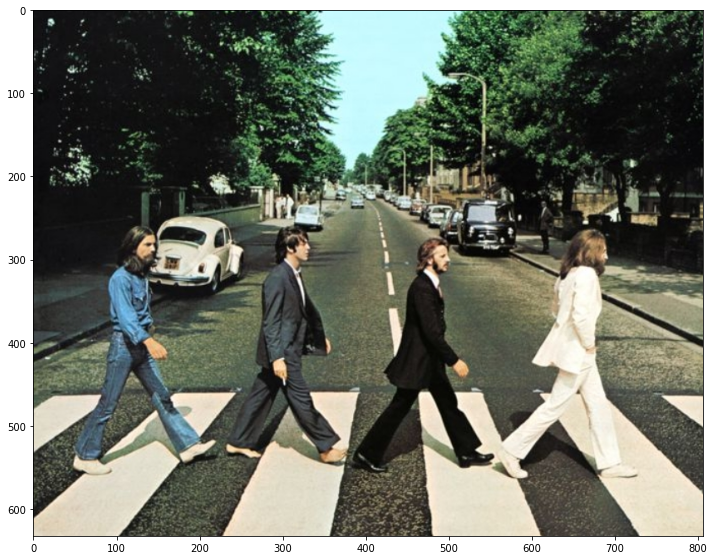

In [25]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [9]:
os.mkdir('/content/DLCV/faster_RCNN') # make new directory

In [11]:
os.chdir('/content/DLCV/faster_RCNN') # change home directory for data download 
os.getcwd()

'/content/DLCV/faster_RCNN'

## Pre_trained Model download(Resnet 50)

In [12]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

--2021-03-07 17:57:37--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.136.128, 2607:f8b0:4001:c34::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.136.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

faster_rcnn_resnet5 100%[===================>] 363.69M   215MB/s    in 1.7s    

2021-03-07 17:57:39 (215 MB/s) - ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2021-03-07 17:57:39--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.

In [13]:
!echo "##### uncompressing tar file"
!tar -xvf faster_rcnn*.gz ##tgr file zip out

##### uncompressing tar file
faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [15]:
!mv /content/DLCV/faster_RCNN/faster_rcnn*.pbtxt /content/DLCV/faster_RCNN/faster_rcnn_resnet50_coco_2018_01_28/graph.pbtxt #move file

In [16]:
!rm *.gz #tgr file remove

In [19]:
sorted(os.listdir('/content/DLCV/faster_RCNN/faster_rcnn_resnet50_coco_2018_01_28')) #directiory search

['checkpoint',
 'frozen_inference_graph.pb',
 'graph.pbtxt',
 'model.ckpt.data-00000-of-00001',
 'model.ckpt.index',
 'model.ckpt.meta',
 'pipeline.config',
 'saved_model']

## Tensorflow inference model loading

In [20]:
model_path = '/content/DLCV/faster_RCNN/faster_rcnn_resnet50_coco_2018_01_28/'

cv_net = cv2.dnn.readNetFromTensorflow(model_path+'frozen_inference_graph.pb',model_path+'graph.pbtxt')

## Lablel Mapping

In [33]:
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}


## Preprocessing & Faster_RCNN Object Detection Visualization

In [27]:
row = img.shape[0] 
col = img.shape[1]

draw_img = img.copy()

In [29]:
cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB=True, crop=False))

cv_out = cv_net.forward() ## 현재  object Detection 값들이 다 들어가 있다.
print(cv_out.shape)## 100:object Detection 의 개수, 7:Bounding Box의 좌표, class ID 값들, score값

(1, 1, 100, 7)


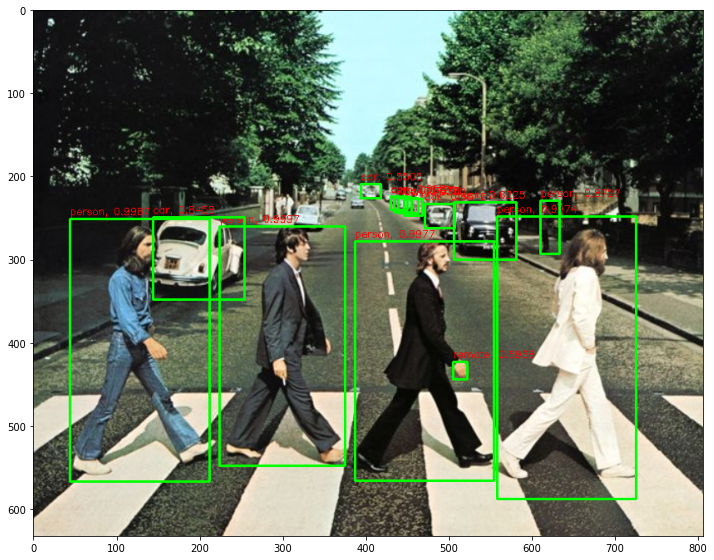

In [36]:
red = (255,0,0)
green = (0,255,0)

for detection in cv_out[0,0,:,:]: ##총 100개의 object에대해서 for문 작용(다양한 anchor박스의 적용으로)
    class_id=int(detection[1])
    score = float(detection[2])
    
    if score>0.5: #score가 0.5이상인 object들에 한에서 원본이미지 비율로 좌표 계산.(지저분한 anchor박스 제거)
        left = detection[3]*col
        top = detection[4]*row
        right = detection[5]*col
        bottom = detection[6]*row

        caption = "{}, {:.4f}".format(labels_to_names_0[class_id],score)
        cv2.rectangle(draw_img, (int(left),int(top)),(int(right),int(bottom)),color=green, thickness=2)
        cv2.putText(draw_img, caption, (int(left),int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=red, thickness=1)

plt.figure(figsize=(12,12))
plt.imshow(draw_img)
plt.show()

## Functional

In [41]:
import time 

def get_detected_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):
    row = img_array.shape[0]
    col = img_array.shape[1]

    draw_img=None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        img_array

    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False))

    start=time.time()
    cv_out = cv_net.forward()

    for detection in cv_out[0,0,:,:]:
        class_id = int(detection[1])
        score = float(detection[2])

        if score > score_threshold:

            left = int(detection[3]*col)
            top = int(detection[4]*row)
            right = int(detection[5]*col)
            bottom = int(detection[6]*row)

            caption = '{}, {:.4f}'.format(labels_to_names_0[class_id],score)
            cv2.rectangle(draw_img, (left,top),(right,bottom),color=green, thickness=2)
            cv2.putText(draw_img, caption, (left,top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=red, thickness=1 )

    if is_print:
        print("수행시간: {:.4f}".format(time.time()-start))

    return draw_img

(633, 806, 3)
수행시간: 8.9078


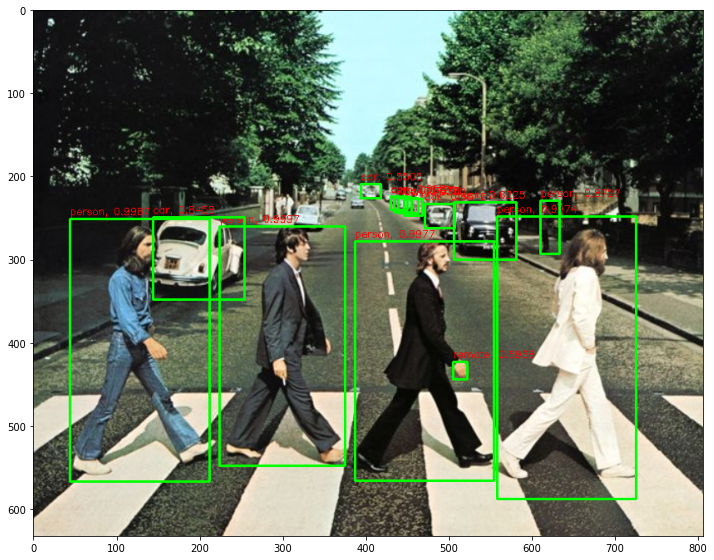

In [42]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

cv_net = cv2.dnn.readNetFromTensorflow('/content/DLCV/faster_RCNN/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb','/content/DLCV/faster_RCNN/faster_rcnn_resnet50_coco_2018_01_28/graph.pbtxt')
draw_img = get_detected_img(cv_net, img, 0.5, use_copied_array=True, is_print=True)

plt.figure(figsize=(12,12))
plt.imshow(draw_img)
plt.show()


## Another Image

(245, 400, 3)
수행시간: 6.7798


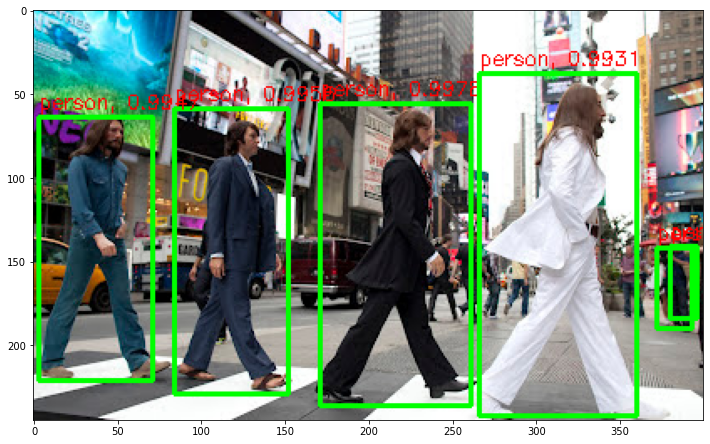

In [43]:
path = '/content/DLCV/data/'
image_path2 = path+'image/beatles02.jpg'

img = cv2.imread(image_path2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

cv_net = cv2.dnn.readNetFromTensorflow('/content/DLCV/faster_RCNN/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb','/content/DLCV/faster_RCNN/faster_rcnn_resnet50_coco_2018_01_28/graph.pbtxt')
draw_img = get_detected_img(cv_net, img, 0.5, use_copied_array=True, is_print=True)

plt.figure(figsize=(12,12))
plt.imshow(draw_img)
plt.show()
